**Installing texthero package to clean the text data**

In [ ]:
!pip install texthero

**Importing the required packages to create a model**

In [ ]:
import pandas as pd
import texthero as hero
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import re
from sklearn.metrics import jaccard_score
import ast
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [ ]:
#connecting cloab notebook with google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the data from the csv file and convert into the dataframe**

In [ ]:
claims_data = pd.read_csv('/content/drive/MyDrive/MyLearning_using_raspberry_pi/Virtusa/MIMIC-III-Final.csv.zip (Unzipped Files)/Extract_features/11_clean_features.csv')
claims_data.head(2)

,TEXT,HADM_ID,ICD9_CODE,Gender,history_of_present_illness,past_medical_history,social_history,discharge_diagnosis,medications_on_admission,family_history,chief_complaint,discharge_condition,physical_exam,major_surgical_or_invasive_procedure
0,{admission date: \n\ndate of birth: ...,100001.0,"['25013', '3371', '5849', '5780', 'V5867', '25...",f,35f w poor control type 1 diabet mellitus w ne...,type 1 diabet melliti w neuropathi nephropathi...,patient live home 8 daughter boyfriend histori...,diabet keotacidosi hematemesi blood vomit hype...,NaN,parent htn t2dm grandfath mi 40s,nausea vomit,NaN,gen awak alert orient heent perrla mmm jvd nec...,none
1,{admission date: \n\ndate of birth: ...,100003.0,"['53100', '2851', '07054', '5715', '45621', '5...",m,mr 59m w hepc cirrhosi c b grade ii esophag va...,hcv cirrhosi tx interferon x2 respon portal ga...,live alon drink alcohol usual one session per ...,peptic ulcer gi bleed,furosemid 20mg daili lisinopril 10 mg daili sp...,nc,coffe ground emesi,asymptomat,admiss vs t95 9 hr 71 bp 83 36 rr 11 96 2l nc ...,egd right ij cvl


**Create a dataset with by combining all 11 features as text as feature and ICD9_CODE column as target**

In [ ]:
claims_data = claims_data.replace({np.nan:""}) 
df = pd.DataFrame()
L = list(claims_data.columns[3:])
df['TEXT'] = claims_data[L].agg(''.join,axis=1)
df['ICD9_CODE'] = claims_data['ICD9_CODE'].copy()
df.head()

,TEXT,ICD9_CODE
0,f35f w poor control type 1 diabet mellitus w n...,"['25013', '3371', '5849', '5780', 'V5867', '25..."
1,mmr 59m w hepc cirrhosi c b grade ii esophag v...,"['53100', '2851', '07054', '5715', '45621', '5..."
2,f48 year old african american femal histori mu...,"['49320', '51881', '486', '20300', '2761', '78..."
3,fms 73 year old femal histori multipl abdomin ...,"['56081', '5570', '9973', '486', '4019']"
4,m60yo man known coronari disea ami lcx well la...,"['41401', '99604', '4142', '25000', '27800', '..."


**Convert y features as seperate columns using MultilabelBinarizer**

In [ ]:
df["ICD9_CODE"] = df["ICD9_CODE"].apply(lambda x: ast.literal_eval(x))
y = df['ICD9_CODE']
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['ICD9_CODE'])
pd.DataFrame(y,columns = multilabel.classes_).head(2)

,0030,0031,0038,0039,0041,0048,0049,0051,00581,0059,0071,0074,00804,00841,00843,00845,00847,0085,00861,00862,00863,00869,0088,0090,0091,0092,0093,01085,01123,01136,01164,01186,01190,01193,01194,01205,01215,01300,01304,01325,...,V8409,V8489,V850,V851,V8521,V8522,V8523,V8524,V8525,V8530,V8531,V8532,V8533,V8534,V8535,V8536,V8537,V8538,V8539,V854,V8541,V8542,V8543,V8544,V8545,V860,V861,V8709,V872,V8741,V8745,V8801,V8811,V8812,V8821,V9010,V9039,V9081,V9089,V9103
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 **Convert x features as frequency of words using tfidf**

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', max_features=20000)
X = tfidf.fit_transform(df['TEXT'])
X

<52722x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 25093021 stored elements in Compressed Sparse Row format>

In [ ]:
#save the tfidf vector for feature reference
#tf_transformer = tfidf.fit(df['TEXT'])
# Dump the file
#pickle.dump(tf_transformer, open("/content/drive/MyDrive/MyLearning_using_raspberry_pi/Virtusa/MIMIC-III-Final.csv.zip (Unzipped Files)/Extract_features/tfidf1.pkl", "wb"))


**Split the data set into the train and test data sets for model building**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Build Model**

In [ ]:
sgd = SGDClassifier()
lr = LogisticRegression(solver = 'lbfgs')
svc = LinearSVC()
s_vc = SVC()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
s_vc.probability= True
clf = OneVsRestClassifier(gnb)
clf.fit(X_train.todense(),y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [ ]:
#Load the model
#my_model = pickle.load(open('/content/drive/MyDrive/MyLearning_using_raspberry_pi/Virtusa/MIMIC-III-Final.csv.zip (Unzipped Files)/Extract_features/log_11_Basic_Model.sav','rb'))
y_pred = clf.predict(X_test)
print(jaccard_score(y_test,y_pred,average='samples'))

0.1714784855438429


Jaccard similarity coefficient score. The Jaccard index [1], or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

A -> y_actual
B -> y_predicted

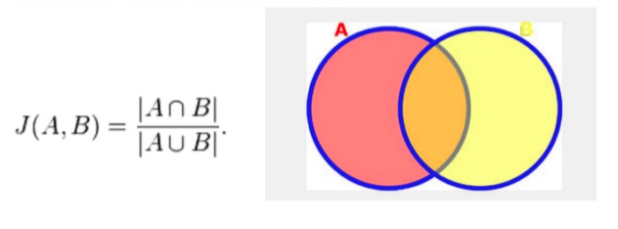